<div><span style="background-color: #9e4244; padding-top: 80px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: white; font-size: 22px; font-weight: bold">Session 1: Introduction to Credit Card Fraud Analysis</span></div>

by BYJ Cirio

<div class="alert alert-danger alert-info">
     In this notebook we will be having an overview of the credit card fraud dataset. Specifically, the topics covered are as follows:<br>
    <ol>
        <li> Exploratory Data Analysis</li>
        <li>Cleaning and Pre-processing</li>
        <li>Baselining</li>
        <li><i>Exercise: Generting Insights thru EDA</i></li>
    </ol>
</div>

In [1]:
!pip install wordcloud
!pip install nltk
!pip install geopandas 



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# general libraries
import warnings
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import Counter
warnings.filterwarnings("ignore")

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emers\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<div><span style="background-color: #ff0257; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFAF0; font-size: 18px; font-weight: bold">Data Cleaning and Preprocessing </span></div>

In [3]:
cc_fraud = pd.read_csv(
    "full_fraud_dataset.csv",
    nrows=2500000)

display(cc_fraud.shape, cc_fraud.head())

(2500000, 25)

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,trans_num,trans_date,trans_time,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,8013-2690062-6,4895039978433579,Harry,Mckee,M,"B20 L43 11th Road, Fitzpatrick Estates",Tagbilaran City,PH,105051,9.65,...,b7e590b6def607cf89d91a9909985b82,2021-02-13,22:39:49,1613255989,misc_net,825.04,1,MedStoreRx,9.265518,123.368859
1,8013-2690062-6,4895039978433579,Harry,Mckee,M,"B20 L43 11th Road, Fitzpatrick Estates",Tagbilaran City,PH,105051,9.65,...,d248c10143858b069bb776065646ac48,2021-02-12,23:01:09,1613170869,grocery_pos,306.55,1,Ever Supermarket,9.236416,124.337292
2,8013-2690062-6,4895039978433579,Harry,Mckee,M,"B20 L43 11th Road, Fitzpatrick Estates",Tagbilaran City,PH,105051,9.65,...,a4fb2e02583977d4afc46b09506611f8,2021-02-12,14:45:57,1613141157,entertainment,346.48,1,Nine Media Corporation,9.460644,124.461767
3,8013-2690062-6,4895039978433579,Harry,Mckee,M,"B20 L43 11th Road, Fitzpatrick Estates",Tagbilaran City,PH,105051,9.65,...,f315ea3abc262b459360f62bd3619c12,2021-02-12,23:08:59,1613171339,shopping_net,919.50,1,Zalora,10.606020,123.930862
4,8013-2690062-6,4895039978433579,Harry,Mckee,M,"B20 L43 11th Road, Fitzpatrick Estates",Tagbilaran City,PH,105051,9.65,...,ac3503258c2fff1c16a381d3633b1e0d,2021-02-13,22:56:43,1613257003,shopping_net,1131.45,1,Ubuy Co.,8.806183,123.719528


In [4]:
cc_fraud["full_name"] = cc_fraud["first"] + ' ' + cc_fraud['last'] 

unique_client = cc_fraud['full_name'].nunique()

print(f'Total number of unique client: {unique_client}')

Total number of unique client: 2204


### 1. Drop Unnecessary Variables

In [5]:
#drop unnecessary variables to dataset
to_drop = ['ssn', 'cc_num', 'first', 'last', 'street', 'state', 
           'zip', 'acct_num', 'trans_num', 'unix_time','full_name']

cc_clean = cc_fraud.drop(to_drop, axis=1)    

cc_clean.head()

,gender,city,lat,long,city_pop,job,dob,trans_date,trans_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-13,22:39:49,misc_net,825.04,1,MedStoreRx,9.265518,123.368859
1,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-12,23:01:09,grocery_pos,306.55,1,Ever Supermarket,9.236416,124.337292
2,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-12,14:45:57,entertainment,346.48,1,Nine Media Corporation,9.460644,124.461767
3,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-12,23:08:59,shopping_net,919.50,1,Zalora,10.606020,123.930862
4,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-13,22:56:43,shopping_net,1131.45,1,Ubuy Co.,8.806183,123.719528


### 2. Clean Date and Time

In [6]:
#transaction data
cc_clean['trans_datetime'] = pd.to_datetime(cc_clean['trans_date'])
cc_clean['trans_date'] = cc_clean['trans_datetime'].dt.date

#treat year as str not int
cc_clean['trans_year'] = cc_clean['trans_datetime'].dt.year.astype(str)
cc_clean['trans_month'] = cc_clean['trans_datetime'].dt.month
cc_clean['trans_day'] = cc_clean['trans_datetime'].dt.day

#transaction time
cc_clean['trans_hour'] = cc_clean['trans_time'].str[:2].astype(int)

#convert month to string
month_map = {1: 'Jan', 
             2: 'Feb', 
             3: 'Mar',
             4: 'Apr', 
             5: 'May', 
             6: 'Jun',
             7: 'July', 
             8: 'Aug',
             9: 'Sep',
            10: 'Oct', 
            11: 'Nov',
            12: 'Dec'}

cc_clean['trans_month_str'] = cc_clean['trans_month'].map(month_map)

In [7]:
def get_part_of_day(hour):
    if (hour> 22) or (hour<=6):
        return 'early morning'
    elif hour <= 11:
        return 'breakfast'
    elif hour <= 14:
        return 'lunch'
    elif hour <= 17:
        return 'afternoon'
    else:
        return 'evening'
    
cc_clean.loc[:, 'part_of_day'] = cc_clean['trans_hour'].apply(get_part_of_day)

In [8]:
cc_clean.head()

,gender,city,lat,long,city_pop,job,dob,trans_date,trans_time,category,...,merchant,merch_lat,merch_long,trans_datetime,trans_year,trans_month,trans_day,trans_hour,trans_month_str,part_of_day
0,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-13,22:39:49,misc_net,...,MedStoreRx,9.265518,123.368859,2021-02-13,2021,2,13,22,Feb,evening
1,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-12,23:01:09,grocery_pos,...,Ever Supermarket,9.236416,124.337292,2021-02-12,2021,2,12,23,Feb,early morning
2,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-12,14:45:57,entertainment,...,Nine Media Corporation,9.460644,124.461767,2021-02-12,2021,2,12,14,Feb,lunch
3,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-12,23:08:59,shopping_net,...,Zalora,10.606020,123.930862,2021-02-12,2021,2,12,23,Feb,early morning
4,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-13,22:56:43,shopping_net,...,Ubuy Co.,8.806183,123.719528,2021-02-13,2021,2,13,22,Feb,evening


### 3. Age

In [9]:
cc_clean['dob_datetime'] = pd.to_datetime(cc_clean['dob'])
cc_clean['dob'] = cc_clean['dob_datetime'].dt.date
cc_clean['age'] = (cc_clean['trans_date'] - cc_clean['dob'])/365
cc_clean['age'] = cc_clean['age'].apply(lambda x: x.days)

cc_clean.head()

,gender,city,lat,long,city_pop,job,dob,trans_date,trans_time,category,...,merch_long,trans_datetime,trans_year,trans_month,trans_day,trans_hour,trans_month_str,part_of_day,dob_datetime,age
0,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-13,22:39:49,misc_net,...,123.368859,2021-02-13,2021,2,13,22,Feb,evening,1960-08-31,60
1,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-12,23:01:09,grocery_pos,...,124.337292,2021-02-12,2021,2,12,23,Feb,early morning,1960-08-31,60
2,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-12,14:45:57,entertainment,...,124.461767,2021-02-12,2021,2,12,14,Feb,lunch,1960-08-31,60
3,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-12,23:08:59,shopping_net,...,123.930862,2021-02-12,2021,2,12,23,Feb,early morning,1960-08-31,60
4,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,1960-08-31,2021-02-13,22:56:43,shopping_net,...,123.719528,2021-02-13,2021,2,13,22,Feb,evening,1960-08-31,60


### 4. Retain final columns

In [10]:
to_drop2 = ['dob','trans_date', 'trans_month', 'trans_datetime', 'dob_datetime', 'trans_time', 'trans_hour']
cc_final = cc_clean.drop(to_drop2, axis=1)

cc_final.head()


,gender,city,lat,long,city_pop,job,category,amt,is_fraud,merchant,merch_lat,merch_long,trans_year,trans_day,trans_month_str,part_of_day,age
0,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,misc_net,825.04,1,MedStoreRx,9.265518,123.368859,2021,13,Feb,evening,60
1,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,grocery_pos,306.55,1,Ever Supermarket,9.236416,124.337292,2021,12,Feb,early morning,60
2,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,entertainment,346.48,1,Nine Media Corporation,9.460644,124.461767,2021,12,Feb,lunch,60
3,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,shopping_net,919.50,1,Zalora,10.606020,123.930862,2021,12,Feb,early morning,60
4,M,Tagbilaran City,9.65,123.85,105051,Planning and development surveyor,shopping_net,1131.45,1,Ubuy Co.,8.806183,123.719528,2021,13,Feb,evening,60


In [11]:
cc_final.dtypes

gender              object
city                object
lat                float64
long               float64
city_pop             int64
job                 object
category            object
amt                float64
is_fraud             int64
merchant            object
merch_lat          float64
merch_long         float64
trans_year          object
trans_day            int64
trans_month_str     object
part_of_day         object
age                  int64
dtype: object

### 5. One-hot encode categorical variables

In [12]:
to_drop3 = []

for col in tqdm(cc_final.columns):
    if cc_final[col].dtype == 'O':
        dummies = pd.get_dummies(cc_final[col], prefix=col, drop_first=False)
        cc_final = pd.concat([cc_final, dummies], axis=1)
        to_drop3.append(col)
        
cc_final = cc_final.drop(to_drop3, axis=1)
cc_final

100%|██████████████████████████████████████████████████| 17/17 [00:12<00:00,  1.41it/s]


,lat,long,city_pop,amt,is_fraud,merch_lat,merch_long,trans_day,age,gender_F,...,trans_month_str_Mar,trans_month_str_May,trans_month_str_Nov,trans_month_str_Oct,trans_month_str_Sep,part_of_day_afternoon,part_of_day_breakfast,part_of_day_early morning,part_of_day_evening,part_of_day_lunch
0,9.6500,123.8500,105051,825.04,1,9.265518,123.368859,13,60,0,...,0,0,0,0,0,0,0,0,1,0
1,9.6500,123.8500,105051,306.55,1,9.236416,124.337292,12,60,0,...,0,0,0,0,0,0,0,1,0,0
2,9.6500,123.8500,105051,346.48,1,9.460644,124.461767,12,60,0,...,0,0,0,0,0,0,0,0,0,1
3,9.6500,123.8500,105051,919.50,1,10.606020,123.930862,12,60,0,...,0,0,0,0,0,0,0,1,0,0
4,9.6500,123.8500,105051,1131.45,1,8.806183,123.719528,13,60,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499995,7.4478,125.8078,259444,3.04,0,6.952074,125.221857,3,60,1,...,0,0,1,0,0,0,0,1,0,0
2499996,7.4478,125.8078,259444,8.93,0,7.422076,125.672921,6,58,1,...,0,0,0,0,0,0,1,0,0,0
2499997,7.4478,125.8078,259444,61.19,0,8.295722,125.031923,1,59,1,...,0,0,0,1,0,0,0,1,0,0
2499998,7.4478,125.8078,259444,1.20,0,6.865968,125.343663,30,59,1,...,0,0,0,0,0,0,1,0,0,0


<div><span style="background-color: #ff0257; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFAF0; font-size: 18px; font-weight: bold">Exploratory Data Analysis </span></div>

### Valid vs Fraud 

valid    2478338
fraud      21662
Name: Class, dtype: int64

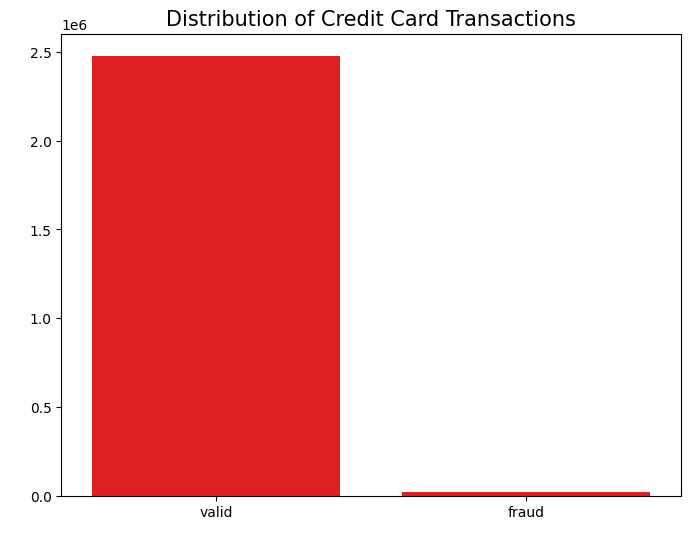

In [13]:
fraud_map = {0: 'valid',
            1: 'fraud'}

cc_fraud_eda = cc_clean.copy()
cc_fraud_eda['Class'] = cc_fraud_eda['is_fraud'].map(fraud_map)

fig,ax = plt.subplots(figsize=(8,6))
ax=sns.countplot(x=cc_fraud_eda['Class'],
              order=cc_fraud_eda['Class'].value_counts().index,
                color='red')

ax.set_xlabel(' ')
ax.set_ylabel(' ')

ax.set_title('Distribution of Credit Card Transactions', size=15, y=1)
display(cc_fraud_eda['Class'].value_counts())
plt.show()

### Gender

Male      2414028
Female      85972
Name: Gender_, dtype: int64

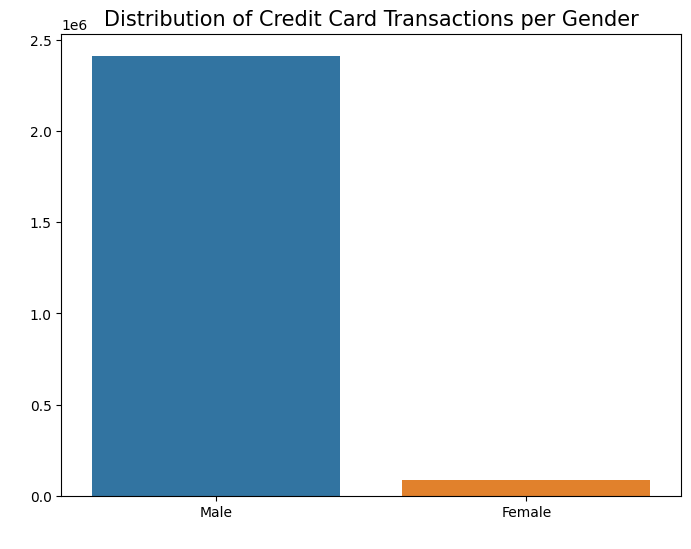

In [14]:
gender_map = {'M': 'Male',
            'F': 'Female'}

cc_fraud_eda['Gender_'] = cc_fraud_eda['gender'].map(gender_map)

fig,ax = plt.subplots(figsize=(8,6))
ax=sns.countplot(x=cc_fraud_eda['Gender_'],
              order=cc_fraud_eda['Gender_'].value_counts().index)

ax.set_xlabel(' ')
ax.set_ylabel(' ')
ax.set_title('Distribution of Credit Card Transactions per Gender', size=15, y=1)
display(cc_fraud_eda['Gender_'].value_counts())
plt.show()

### Location

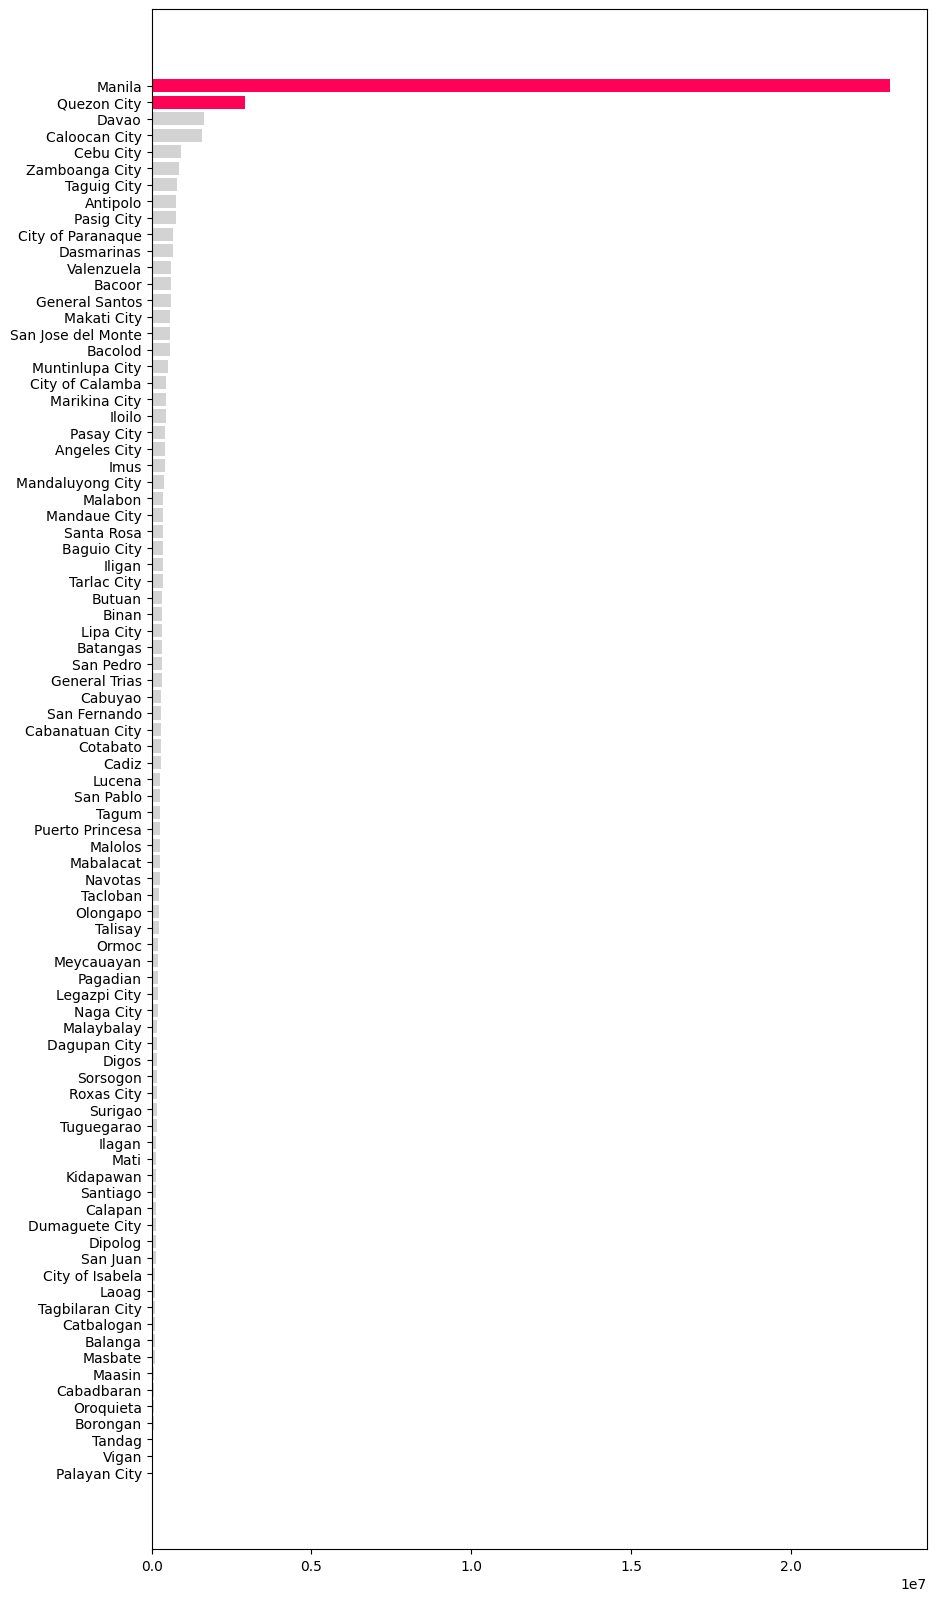

In [15]:
cc_city= cc_fraud_eda.drop_duplicates(subset=['city'])\
            .reset_index(drop=True).sort_values(['city_pop'])

colors_l = ['lightgray'] * 85
colors_l[-2:] = ['#ff0257'] * 2

fig,ax = plt.subplots(figsize=(10,20))
ax.barh(cc_city.city, cc_city.city_pop, color=colors_l)

plt.show()

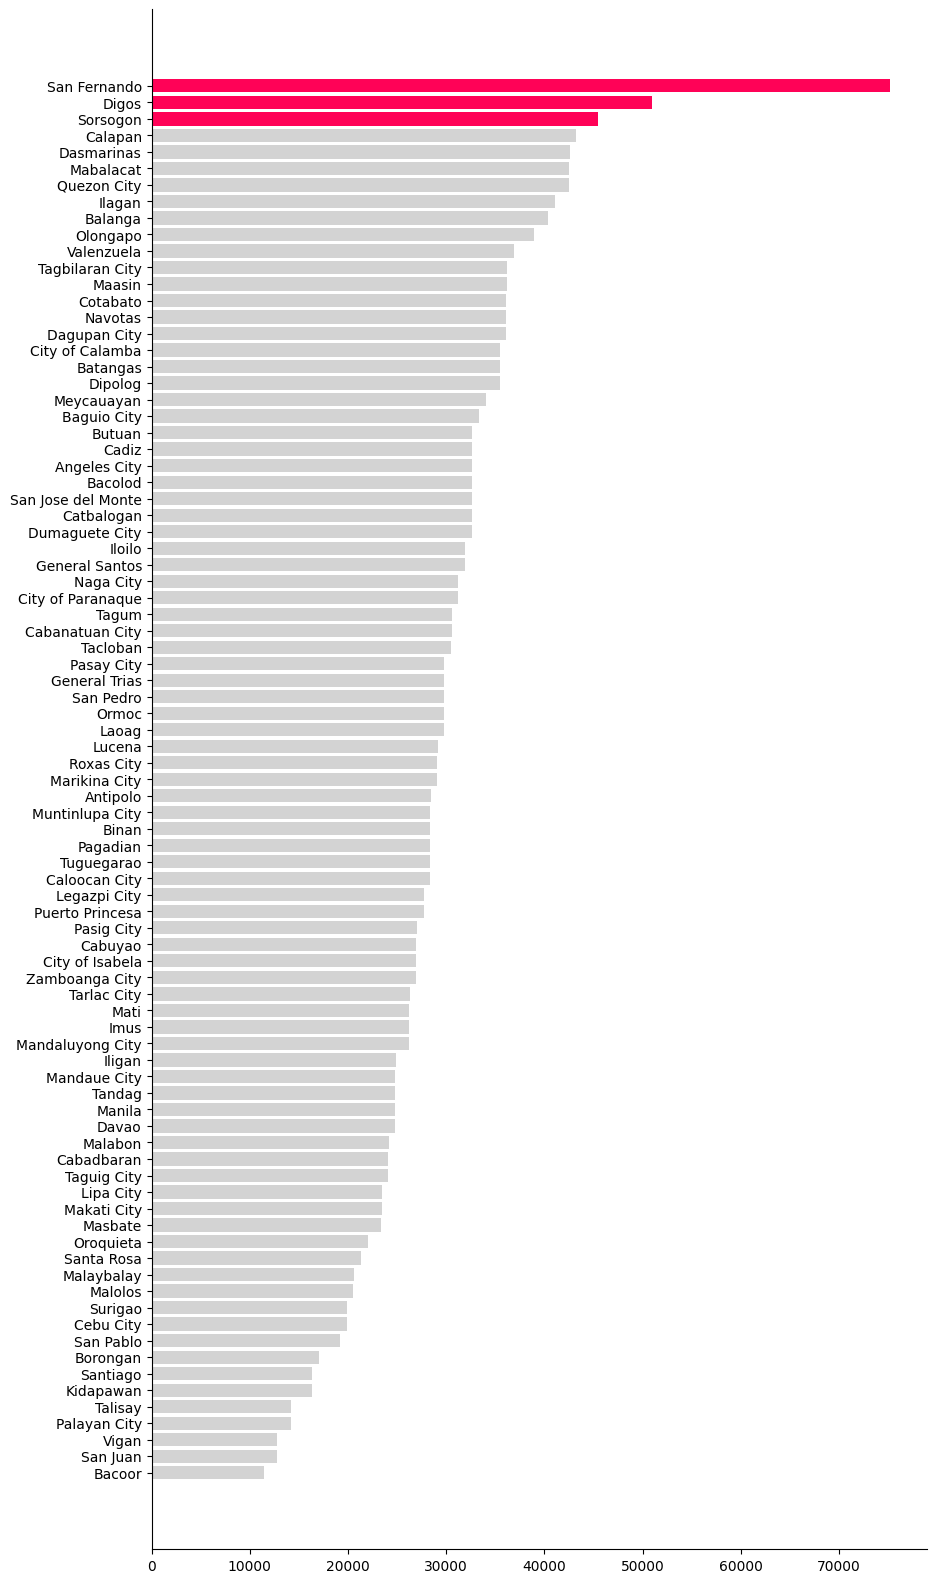

In [16]:
cc_city_2 = pd.DataFrame({'trans_count': cc_fraud_eda['city'].value_counts().sort_values()})

colors_h = ['lightgray'] * 85
colors_h[-3:] = ['#ff0257'] * 3

fig, ax = plt.subplots(figsize=(10, 20))
ax.barh(cc_city_2.index, cc_city_2.trans_count, color=colors_h)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
plt.show()

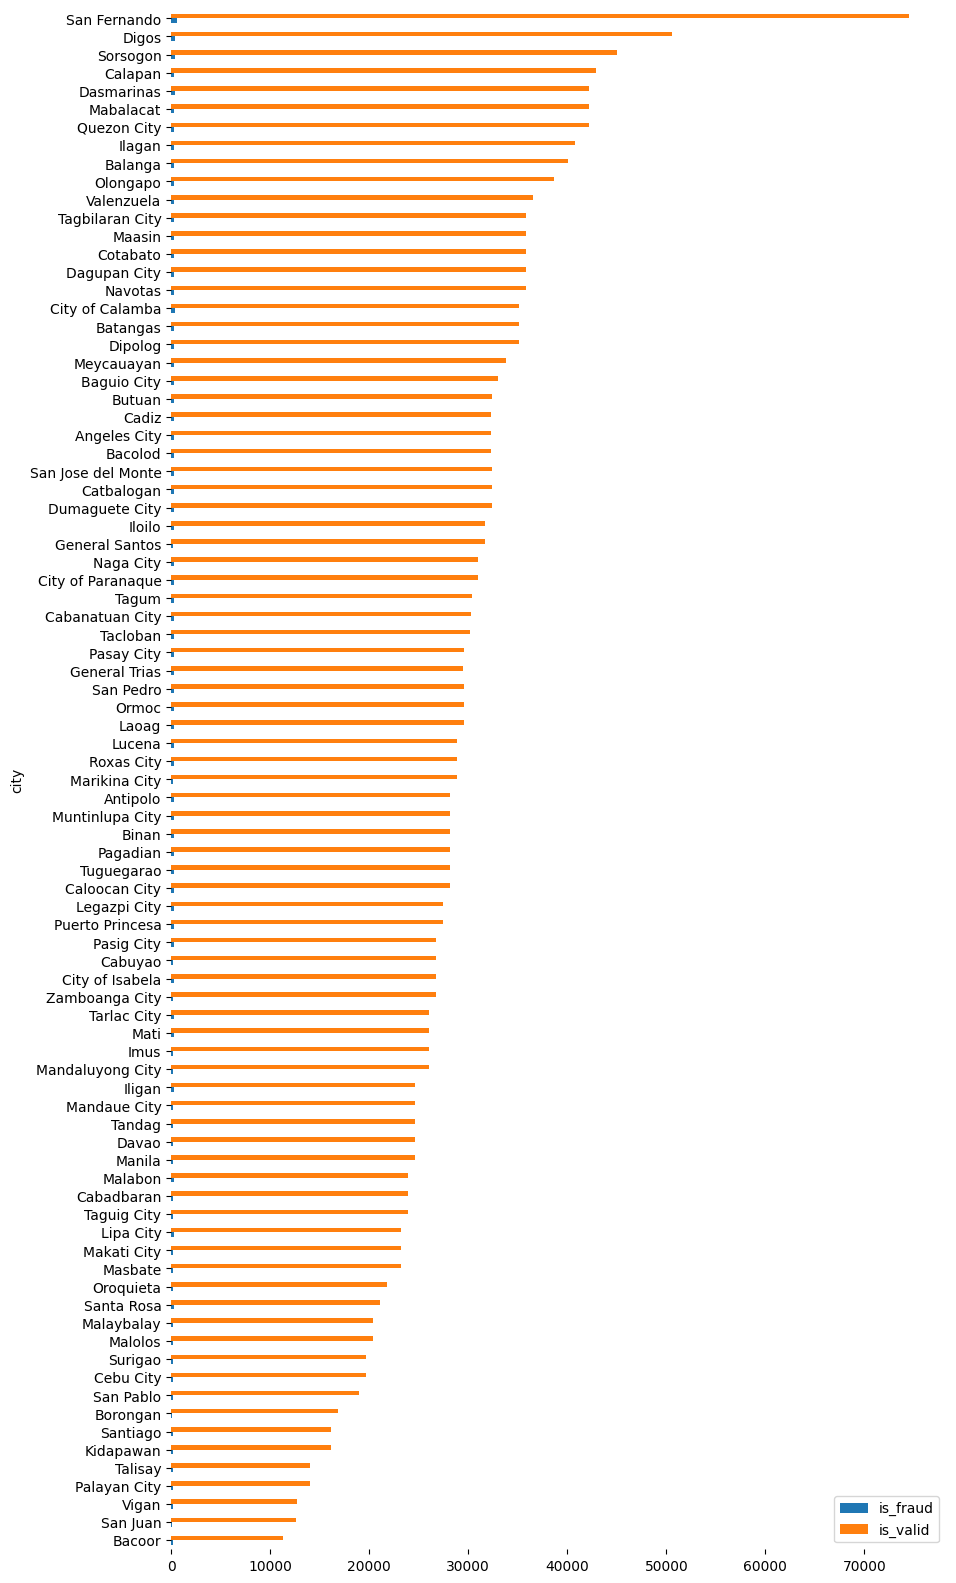

In [17]:
cc_city_3 = pd.DataFrame(cc_fraud_eda.groupby('city')['is_fraud'].sum())
cc_city_3 = cc_city_3.join(cc_city_2).sort_values(['trans_count'])
cc_city_3['is_valid'] = cc_city_3['trans_count'] - cc_city_3['is_fraud']
cc_city_3 = cc_city_3[['is_fraud', 'is_valid']]

cc_city_3.plot.barh(figsize=(10,20))
axes = plt.gca() 
axes.spines['top'].set_visible(False)
plt.setp(axes.spines.values(), visible=False)
plt.show()

### Jobs

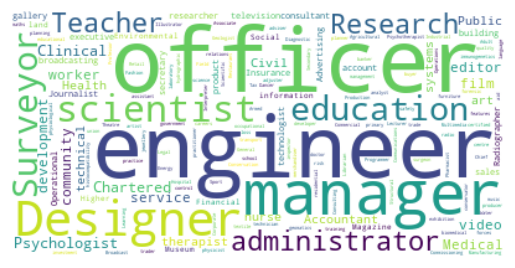

In [18]:
cc_jobs = cc_fraud.drop_duplicates(subset=['full_name']).reset_index(drop=True)


words=[]
for phrase in cc_jobs['job'].values:
    for word in phrase.split():
        words.append(word)
        
jobs_list = ' '.join(words)

stop_words = stopwords.words('english')
stop_words = set(stop_words)

wordcloud = WordCloud(background_color='white',
                     collocations=False).generate(jobs_list)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

### Merchant Category

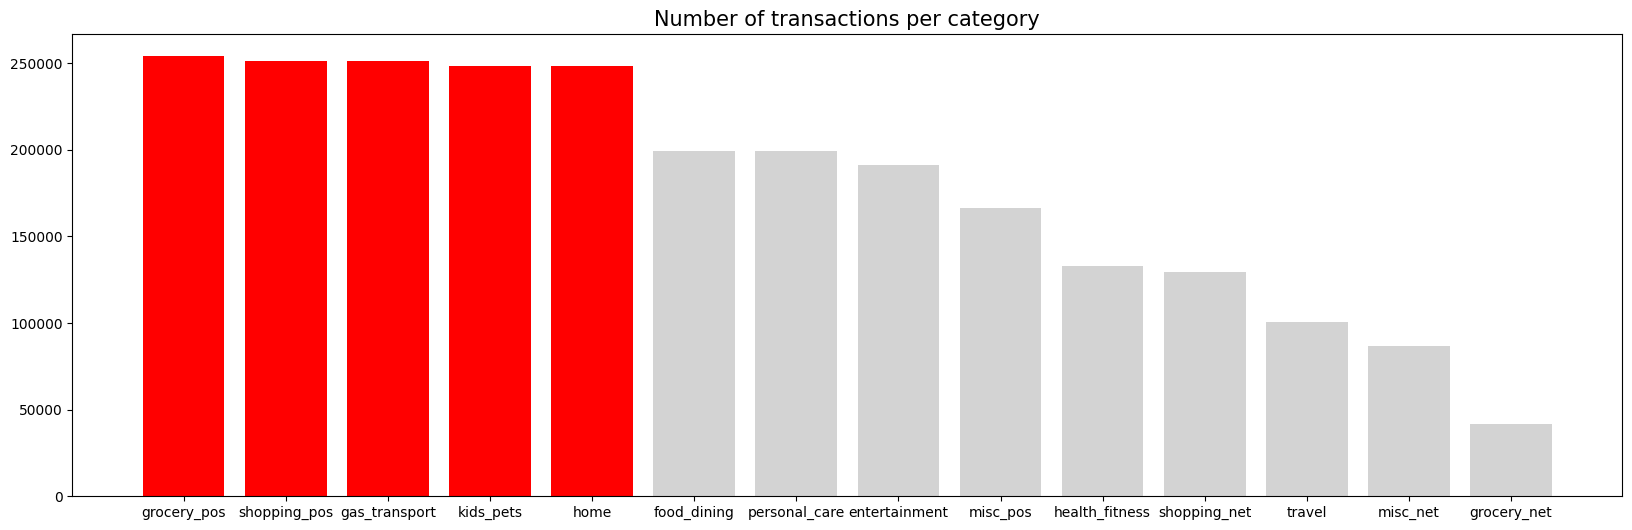

In [19]:
cc_mc= pd.DataFrame(cc_fraud_eda['category'].value_counts())

colors_l = ['lightgray'] * 14
colors_l[:2] = ['red'] *5

fig, ax = plt.subplots(figsize=(20,6))
ax.bar(cc_mc.index, cc_mc.category, color=colors_l)

ax.set_title('Number of transactions per category', size=15, y=1)
plt.show()

In [20]:
cc_fraud_eda['trans_month']

0           2
1           2
2           2
3           2
4           2
           ..
2499995    11
2499996     4
2499997    10
2499998     4
2499999     6
Name: trans_month, Length: 2500000, dtype: int64

### Date

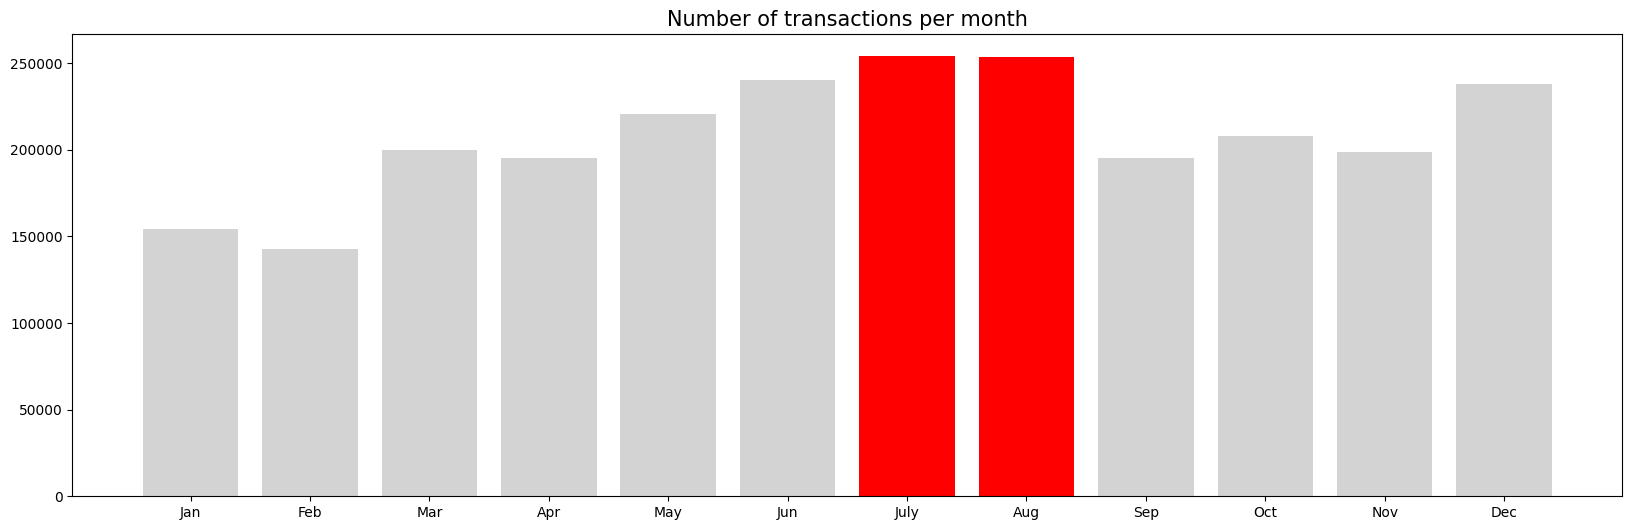

In [21]:
date= pd.DataFrame(cc_fraud_eda['trans_month_str'].value_counts()).reset_index().sort_values(['index'])

map_month = cc_fraud_eda.drop_duplicates(['trans_month'])[['trans_month', "trans_month_str"]]
map_month.columns= ['trans_month', 'index']
cc_date = map_month.merge(date, on='index').sort_values(['trans_month'])

colors_d = ['lightgray'] * 14
colors_d[6:8] = ['red'] *2

fig, ax = plt.subplots(figsize=(20,6))
ax.bar(cc_date['index'], cc_date['trans_month_str'], color=colors_d)

ax.set_title('Number of transactions per month', size=15, y=1)
plt.show()

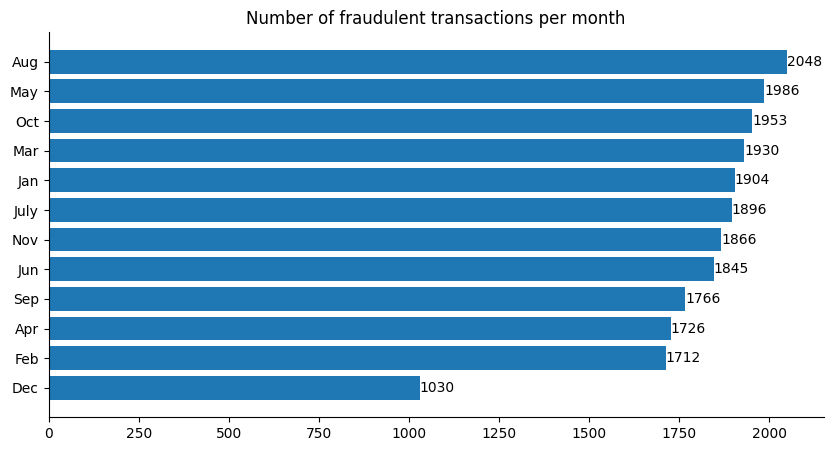

In [22]:
month_fraud= cc_fraud_eda[cc_fraud_eda['is_fraud']==1]
month_fraud = pd.DataFrame(month_fraud['trans_month_str'].value_counts()).reset_index().sort_values('trans_month_str',ascending=True)

fig, ax = plt.subplots(figsize=(10, 5))
hbar = ax.barh(month_fraud['index'], month_fraud.trans_month_str)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Number of fraudulent transactions per month')
ax.bar_label(hbar)
plt.show()

In [78]:
month_fraud= cc_fraud_eda[cc_fraud_eda['is_fraud']==1]
month_fraud_groupby = month_fraud.groupby(['trans_year','trans_month'])[['trans_year']].count().sort_values('trans_month')
month_fraud_groupby

,,trans_year
trans_year,trans_month,
2020,1,998
2021,1,906
2020,2,924
2021,2,788
2020,3,935
2021,3,995
2020,4,819
2021,4,907
2020,5,1032


### Transaction Amount

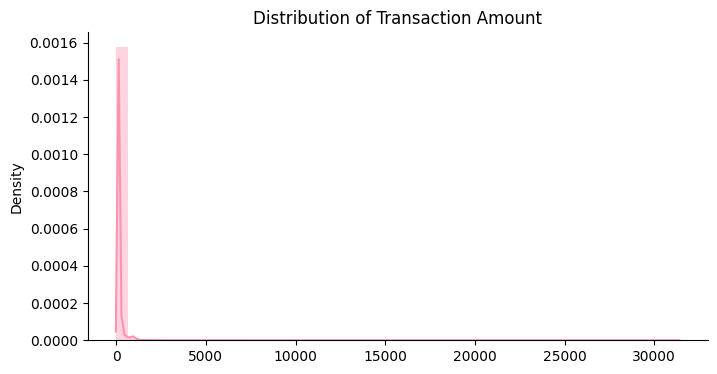

In [23]:
fig, ax = plt.subplots(figsize=(8,4))
sns.distplot(cc_fraud_eda['amt'].values, ax=ax, color="#FC94AF")
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.set_title('Distribution of Transaction Amount')
plt.show()

### Correlation

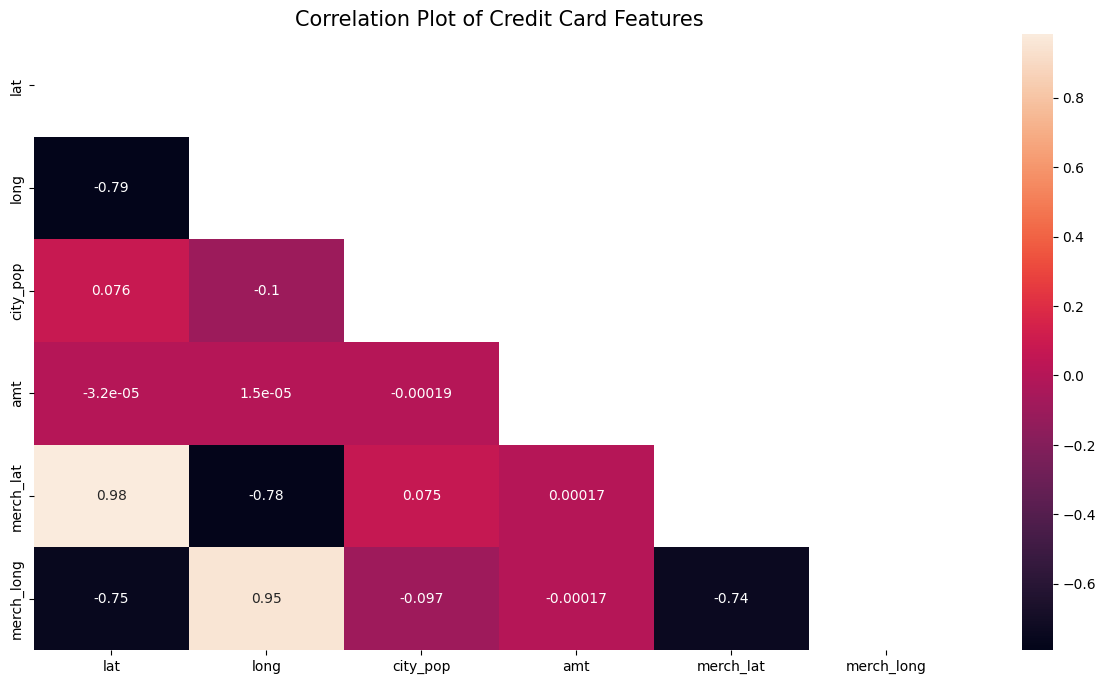

In [24]:
quant = cc_fraud_eda[['lat', 'long', 'city_pop', 'amt', 'merch_lat', 'merch_long']]

corr = quant.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.heatmap(corr, mask=mask, annot=True)
ax.set_title("Correlation Plot of Credit Card Features", fontsize=15, y=1)
plt.show()

<div><span style="background-color: #ff0257; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFAF0; font-size: 18px; font-weight: bold">Baselining </span></div>

In [25]:
df_target = cc_final['is_fraud']

state_counts = Counter(df_target)
df_state = pd.DataFrame.from_dict(state_counts, orient='index')

num = (df_state[0]/df_state[0].sum()) ** 2

print("Proportion Chance Criterion: {:0.2f}%".format(100*num.sum()))
print("1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25*100*num.sum()))

Proportion Chance Criterion: 98.28%
1.25 * Proportion Chance Criterion: 122.85%


<div><span style="background-color: #ff0257; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: #FFFAF0; font-size: 18px; font-weight: bold">Exercise </span></div>

We have explored and interpreted some charactertistics of the credit card fraud dataset. Now, it's your turn to generate interesting insights! Here are some of the things that you can explore but feel free to add anything you can think of :)
- What if we group the city per region, what region has the highest number of transactions? valid? fraud? population? transaction amount?
- What year, day of week, time of day has the highest number of transactions? transaction amount?
- What merchant has the highest number of transactions? transaction amount?
- What is the distribution of age? 
- What are the descriptive statistics (mean, max, min) and distribution of the quantitative variables?

### City per Region

In [26]:
#cc_fraud_eda[cc_fraud_eda['city'].str.contains('San Fernando')]


cc_fraud_eda[cc_fraud_eda['city']=="San Fernando"].groupby(['city_pop','lat'])['city'].count()

city_pop  lat    
121812    16.6167    40378
306659    15.0333    34775
Name: city, dtype: int64

In [27]:
cc_fraud_eda.dtypes

gender                     object
city                       object
lat                       float64
long                      float64
city_pop                    int64
job                        object
dob                        object
trans_date                 object
trans_time                 object
category                   object
amt                       float64
is_fraud                    int64
merchant                   object
merch_lat                 float64
merch_long                float64
trans_datetime     datetime64[ns]
trans_year                 object
trans_month                 int64
trans_day                   int64
trans_hour                  int32
trans_month_str            object
part_of_day                object
dob_datetime       datetime64[ns]
age                         int64
Class                      object
Gender_                    object
dtype: object

In [28]:
cc_fraud_eda.loc[(cc_fraud_eda['city']=="San Fernando") & (cc_fraud_eda['city_pop'] == 306659), 'city'] = "San Fernando City"


In [29]:
region_1 =['Dagupan City', 'San Carlos', 'Alaminos', 'Urdaneta', 'Laoag', 'Vigan', 'Candon','San Fernando']
region_2= ['Tuguegarao', 'Cauayan', 'Ilagan', 'Santiago']
region_3 =['Balanga', 'Malolos', 'Meycauayan', 'San Jose del Monte', 'Cabanatuan City',
           'Gapan', 'Munoz', 'Palayan City', 'Angeles City', 'Mabalacat', 'San Fernando City',
           'Tarlac City', 'Olongapo', 'San Jose']
region_4a = ['Batangas', 'Lipa City', 'Tanauan', 'Bacoor', 'Cavite', 'Dasmarinas', 'Imus',
            'Tagaytay', 'Trece Martices', 'Binan', 'Cabuyao', 'San Pablo', 'Santa Rosa', 'San Pedro',
            'Lucena', 'Tayabas', 'Antipolo', 'City of Calamba', 'General Trias']
region_4b = ['Calapan', 'Puerto Princesa']
region_5 =['Legazpi City', 'Ligao', 'Tabaco', 'Iriga', 'Naga City', 'Masbate', 'Sorsogon']
region_6 = ['Roxas City', 'Iloilo', 'Passi', 'Bacolod', 'Bago', 'Cadiz', 'Escalante', 'Himamaylan',
           'Kabankalan', 'La Carlota', 'Sagay', 'San Carlos', 'Silay', 'Sipalay', 
           'Talisay', 'Victorias']
region_7 = ['Tagbilaran City', 'Bogo', 'Carcar', 'Cebu City', 'Danao', 'Lapu-Lapu', 'Mandaue City', 'Bais',
           'Bayawan', 'Canlaon', 'Dumaguete City', 'Guihulngan', 'Tanjay']
region_8 = ['Borongan', 'Baybay', 'Ormoc', 'Tacloban', 'Calbayog', 'Catbalogan', 'Maasin']
region_9 = ['City of Isabela', 'Dapitan', 'Dipolog', 'Pagadian', 'Zamboanga City']
region_10 = ['Malaybalay', 'Valencia', 'Iligan', 'Oroquieta', 'Ozamiz', 'Tangub', 'Cagayan de Oro',
            'El Salvador', 'Gingoog']
region_11 = ['Panabo', 'Samal' ,'Tagum', 'Davao', 'Digos', 'Mati']
region_12 = ['Kidapawan','Cotabato', 'General Santos', 'Koronadal', 'Tacurong' ]
region_13 = ['Butuan', 'Cabadbaran', 'Bayugan', 'Surigao', 'Bislig', 'Tandag']
armm = ['Lawitan', 'Marawi']
car = ['Baguio City', 'Tabuk']
ncr = ['Caloocan City', 'Las Pinas City', 'Manila' , 'Makati City', 'Malabon', 'Mandaluyong City', 'Manila',
      'Marikina City', 'Muntinlupa City', 'Navotas', 'City of Paranaque', 'Pasay City', 'Pasig City', 'San Juan', 
      'Taguig City', 'Valenzuela', 'Quezon City']

           
    
def get_regions(city):
    if city in region_1:
        return "Region 1"
    elif city in region_2:
        return "Region 2"
    elif city in region_3:
        return "Region 3"
    elif city in region_4a:
        return "CALABARZON"
    elif city in region_4b:
        return "MIMAROPA"
    elif city in region_5:
        return "Region 5"
    elif city in region_6:
        return "Region 6"
    elif city in region_7:
        return "Region 7"
    elif city in region_8:
        return "Region 8"
    elif city in region_9:
        return "Region 9"
    elif city in region_10:
        return "Region 10"
    elif city in region_11:
        return "Region 11"
    elif city in region_12:
        return "Region 12"
    elif city in region_13:
        return "Region 13"
    elif city in armm:
        return "ARMM"
    elif city in car:
        return "CAR"
    elif city in ncr:
        return "NCR"
    else:
        return "Other regions"
    
cc_fraud_eda.loc[:, 'region'] = cc_fraud_eda['city'].apply(get_regions)


In [30]:
cc_fraud_eda[cc_fraud_eda['region']=="Other regions"]

,gender,city,lat,long,city_pop,job,dob,trans_date,trans_time,category,...,trans_month,trans_day,trans_hour,trans_month_str,part_of_day,dob_datetime,age,Class,Gender_,region


In [31]:
cc_fraud_eda[cc_fraud_eda['city']=="San Fernando City"]

,gender,city,lat,long,city_pop,job,dob,trans_date,trans_time,category,...,trans_month,trans_day,trans_hour,trans_month_str,part_of_day,dob_datetime,age,Class,Gender_,region
13464,M,San Fernando City,15.0333,120.6833,306659,Television camera operator,1961-08-16,2020-03-07,03:34:17,grocery_pos,...,3,7,3,Mar,early morning,1961-08-16,58,fraud,Male,Region 3
13465,M,San Fernando City,15.0333,120.6833,306659,Television camera operator,1961-08-16,2020-03-06,01:19:11,grocery_pos,...,3,6,1,Mar,early morning,1961-08-16,58,fraud,Male,Region 3
13466,M,San Fernando City,15.0333,120.6833,306659,Television camera operator,1961-08-16,2020-03-07,01:48:16,gas_transport,...,3,7,1,Mar,early morning,1961-08-16,58,fraud,Male,Region 3
13467,M,San Fernando City,15.0333,120.6833,306659,Television camera operator,1961-08-16,2020-03-07,00:26:31,grocery_pos,...,3,7,0,Mar,early morning,1961-08-16,58,fraud,Male,Region 3
13468,M,San Fernando City,15.0333,120.6833,306659,Television camera operator,1961-08-16,2020-03-07,22:32:34,shopping_pos,...,3,7,22,Mar,evening,1961-08-16,58,fraud,Male,Region 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498462,F,San Fernando City,15.0333,120.6833,306659,"Radiographer, therapeutic",1931-03-13,2020-11-25,11:54:56,grocery_net,...,11,25,11,Nov,breakfast,1931-03-13,89,fraud,Female,Region 3
2498463,F,San Fernando City,15.0333,120.6833,306659,"Radiographer, therapeutic",1931-03-13,2020-11-25,23:39:33,shopping_net,...,11,25,23,Nov,early morning,1931-03-13,89,fraud,Female,Region 3
2498464,F,San Fernando City,15.0333,120.6833,306659,"Radiographer, therapeutic",1931-03-13,2020-11-25,03:46:12,grocery_pos,...,11,25,3,Nov,early morning,1931-03-13,89,fraud,Female,Region 3
2498465,F,San Fernando City,15.0333,120.6833,306659,"Radiographer, therapeutic",1931-03-13,2020-11-25,14:04:34,shopping_net,...,11,25,14,Nov,lunch,1931-03-13,89,fraud,Female,Region 3


In [32]:
cc_fraud_eda['Class'].value_counts()

valid    2478338
fraud      21662
Name: Class, dtype: int64

In [33]:
data_valid = cc_fraud_eda[cc_fraud_eda['Class']== 'valid']

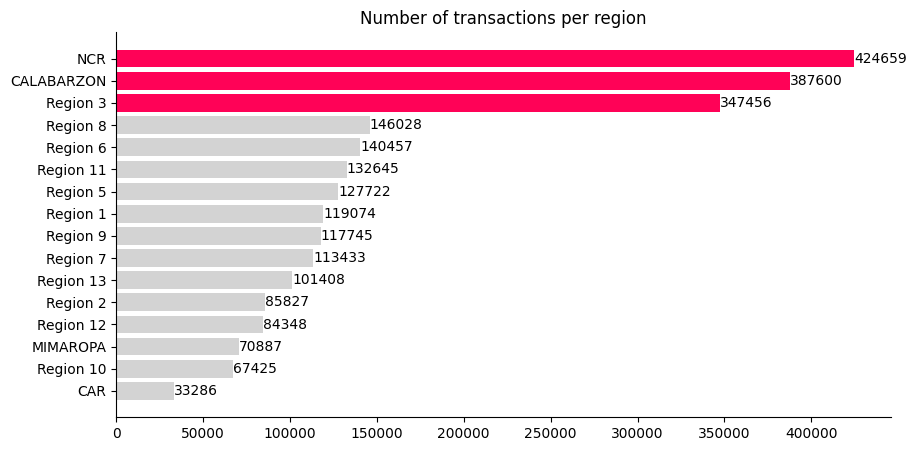

In [34]:
cc_region = pd.DataFrame({'trans_count': cc_fraud_eda['region'].value_counts().sort_values()})

colors_h = ['lightgray'] * 16
colors_h[13:16] = ['#ff0257'] * 3

fig, ax = plt.subplots(figsize=(10, 5))
hbar = ax.barh(cc_region.index, cc_region.trans_count, color=colors_h)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Number of transactions per region')
ax.bar_label(hbar)
plt.show()

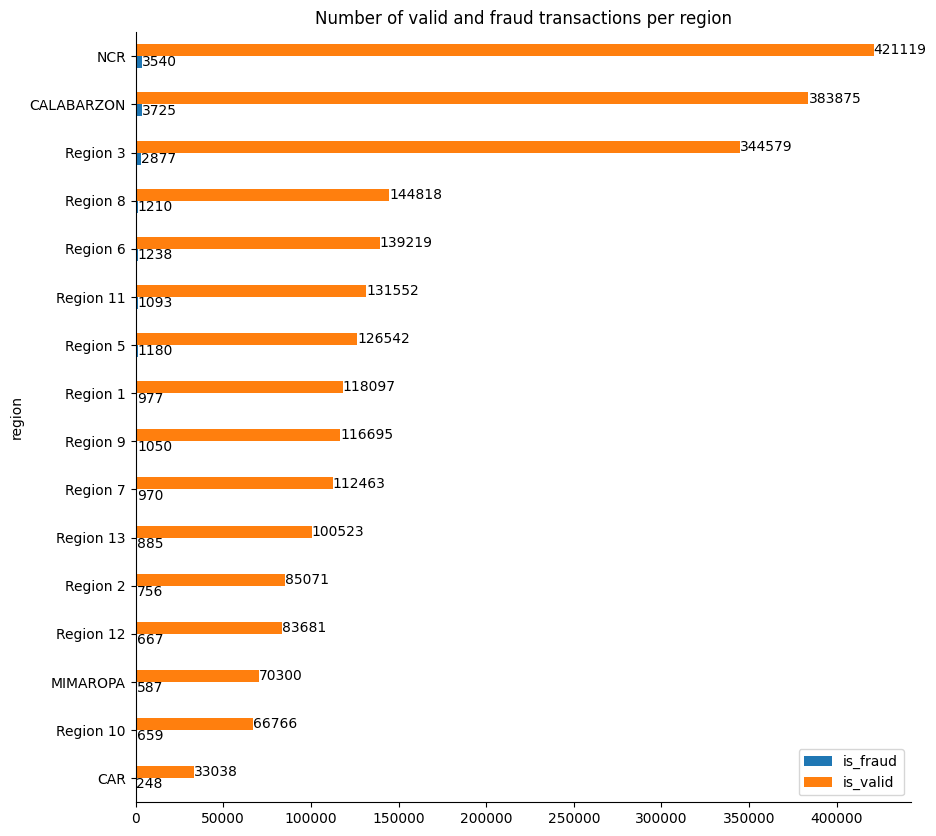

In [35]:
cc_region_2= pd.DataFrame(cc_fraud_eda.groupby('region')['is_fraud'].sum())
cc_region_2 = cc_region_2.join(cc_region).sort_values(['trans_count'])
cc_region_2['is_valid'] = cc_region_2['trans_count'] - cc_region_2['is_fraud']
cc_region_2 = cc_region_2[['is_fraud', 'is_valid']]

ax = cc_region_2.plot.barh(figsize=(10,10), label=['is_fraud', 'is_valid'])
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title("Number of valid and fraud transactions per region")
plt.show()

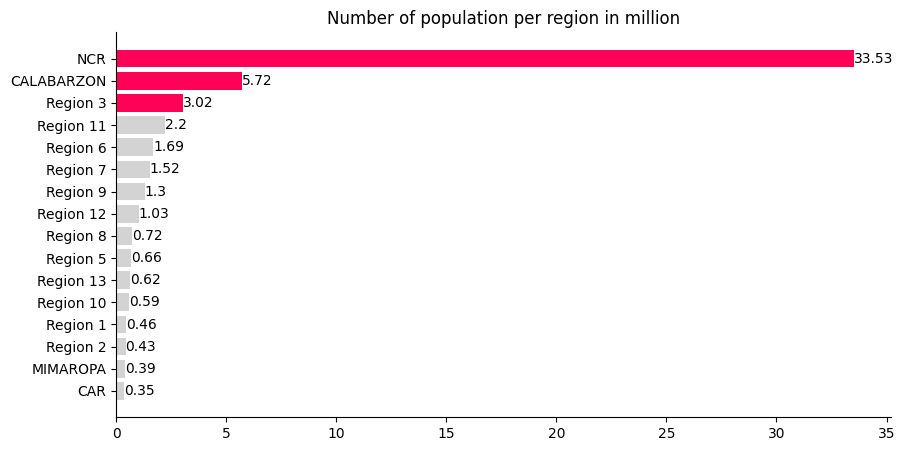

In [36]:
region_pop = cc_fraud_eda.groupby(['city','region'])[['city_pop']].mean().groupby('region')[['city_pop']].sum().sort_values('city_pop')
region_pop['city_pop'] = round(region_pop['city_pop']/1000000,2)


fig, ax = plt.subplots(figsize=(10,5))
hbar = ax.barh(region_pop.index, region_pop.city_pop, color=colors_h)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Number of population per region in million')
ax.bar_label(hbar)
plt.show()

In [37]:
cc_fraud_eda['is_fraud'].value_counts()

0    2478338
1      21662
Name: is_fraud, dtype: int64

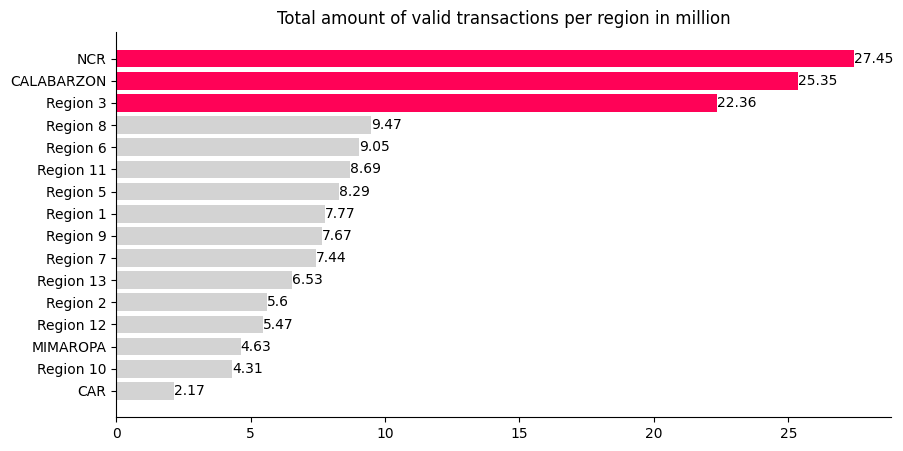

In [38]:
valid_trans = cc_fraud_eda[cc_fraud_eda['is_fraud']==0]
valid_trans_amt = valid_trans.groupby('region')[['amt']].sum().sort_values('amt')
valid_trans_amt['amt'] = round(valid_trans_amt['amt']/1000000,2)

fig, ax = plt.subplots(figsize=(10, 5))
hbar = ax.barh(valid_trans_amt.index, valid_trans_amt.amt, color=colors_h)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Total amount of valid transactions per region in million')
ax.bar_label(hbar)
plt.show()

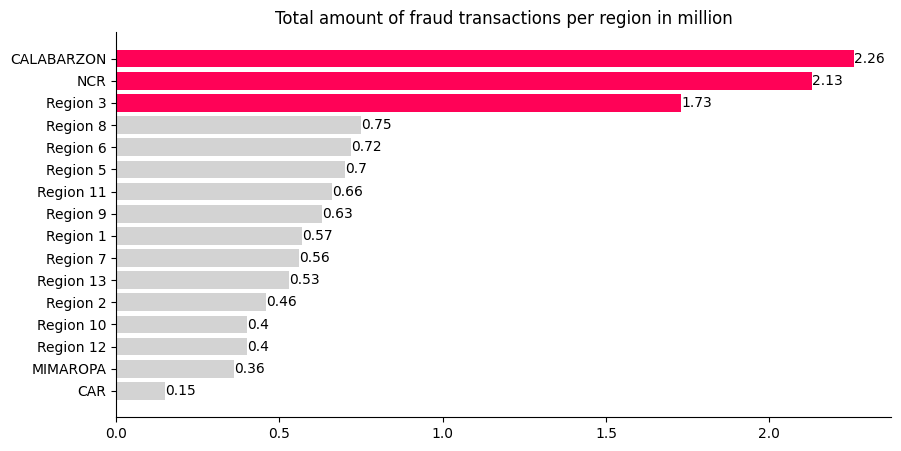

In [39]:
fraud_trans = cc_fraud_eda[cc_fraud_eda['is_fraud']==1]
fraud_trans_amt = fraud_trans.groupby('region')[['amt']].sum().sort_values('amt')
fraud_trans_amt['amt'] = round(fraud_trans_amt['amt']/1000000,2)

fig, ax = plt.subplots(figsize=(10, 5))
hbar = ax.barh(fraud_trans_amt.index, fraud_trans_amt.amt, color=colors_h)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Total amount of fraud transactions per region in million')
ax.bar_label(hbar)
plt.show()

In [40]:
!pip install geopandas
!pip install pycountry


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [42]:
fraud_trans = cc_fraud_eda[cc_fraud_eda['is_fraud']==1]

In [43]:
fraud_geo = gpd.GeoDataFrame(fraud_trans, geometry = gpd.points_from_xy(fraud_trans.long, 
                                                                       fraud_trans.lat))

In [44]:
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

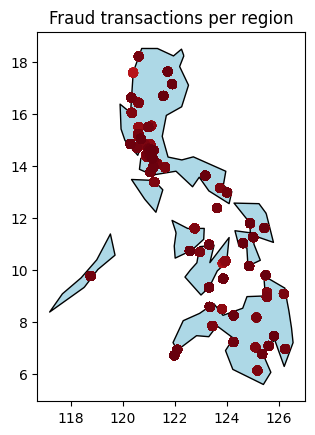

In [45]:
axis = world_data[world_data.name == 'Philippines'].plot(color='lightblue',
                                                        edgecolor='black')

fraud_geo.plot(ax=axis, cmap='Reds', figsize=(20,20))
plt.title('Fraud transactions per region')

plt.show()

### Year

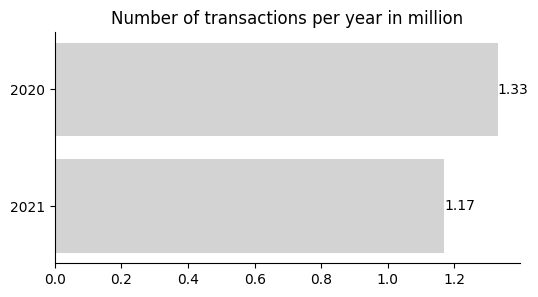

In [46]:
trans_year = pd.DataFrame({'trans_count': cc_fraud_eda['trans_year'].value_counts().sort_values()})
trans_year['trans_count'] = round(trans_year['trans_count']/1000000 ,2)

fig, ax = plt.subplots(figsize=(6,3))
hbar = ax.barh(trans_year.index, trans_year.trans_count, color=colors_h)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Number of transactions per year in million')
ax.bar_label(hbar)
plt.show()

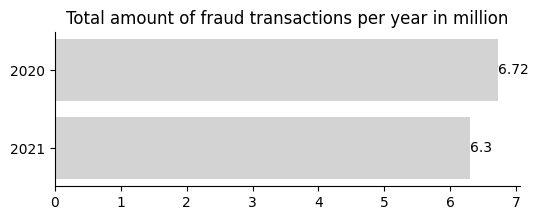

In [47]:
fraud_trans_year = cc_fraud_eda[cc_fraud_eda['is_fraud']==1]
fraud_trans_amt_year = fraud_trans_year.groupby('trans_year')[['amt']].sum().sort_values('amt')
fraud_trans_amt_year['amt'] = round(fraud_trans_amt_year['amt']/1000000,2)

fig, ax = plt.subplots(figsize=(6,2))
hbar = ax.barh(fraud_trans_amt_year.index, fraud_trans_amt_year.amt, color=colors_h)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Total amount of fraud transactions per year in million')
ax.bar_label(hbar)
plt.show()

In [48]:
cc_fraud_eda.dtypes

gender                     object
city                       object
lat                       float64
long                      float64
city_pop                    int64
job                        object
dob                        object
trans_date                 object
trans_time                 object
category                   object
amt                       float64
is_fraud                    int64
merchant                   object
merch_lat                 float64
merch_long                float64
trans_datetime     datetime64[ns]
trans_year                 object
trans_month                 int64
trans_day                   int64
trans_hour                  int32
trans_month_str            object
part_of_day                object
dob_datetime       datetime64[ns]
age                         int64
Class                      object
Gender_                    object
region                     object
dtype: object

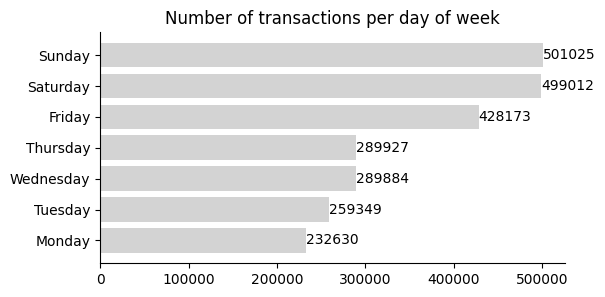

In [49]:
cc_fraud_eda['trans_day_of_week'] = cc_fraud_eda['trans_datetime'].dt.day_name()

trans_day_of_week = pd.DataFrame({'trans_count': cc_fraud_eda['trans_day_of_week'].value_counts().sort_values()})
#trans_day_of_week['trans_count'] = round(trans_day_of_week['trans_count']/100000 ,2)

fig, ax = plt.subplots(figsize=(6,3))
hbar = ax.barh(trans_day_of_week.index, trans_day_of_week.trans_count, color=colors_h)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Number of transactions per day of week')
ax.bar_label(hbar)
plt.show()

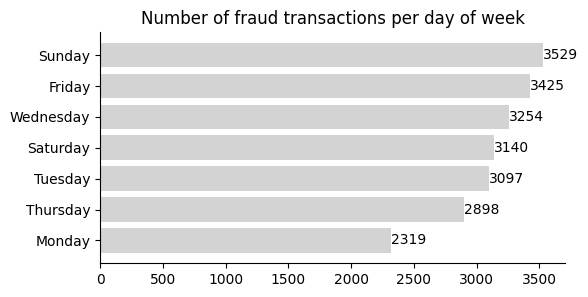

In [50]:
fraud_trans_day_of_week = cc_fraud_eda[cc_fraud_eda['is_fraud']==1]

fraud_trans_day_of_week = pd.DataFrame({'trans_count': fraud_trans_day_of_week['trans_day_of_week'].value_counts().sort_values()})
#trans_day_of_week['trans_count'] = round(trans_day_of_week['trans_count']/100000 ,2)

fig, ax = plt.subplots(figsize=(6,3))
hbar = ax.barh(fraud_trans_day_of_week.index, fraud_trans_day_of_week.trans_count, color=colors_h)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Number of fraud transactions per day of week')
ax.bar_label(hbar)
plt.show()

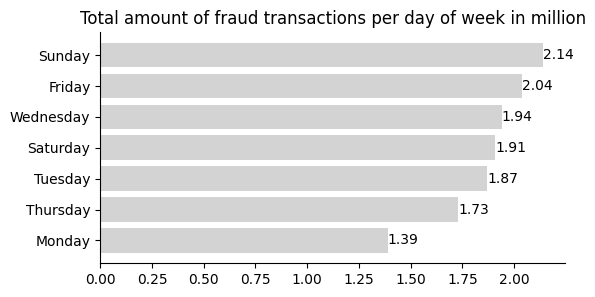

In [51]:
fraud_trans_day_of_week = cc_fraud_eda[cc_fraud_eda['is_fraud']==1]
fraud_trans_amt_day_of_week = fraud_trans_day_of_week.groupby('trans_day_of_week')[['amt']].sum().sort_values('amt')
fraud_trans_amt_day_of_week['amt'] = round(fraud_trans_amt_day_of_week['amt']/1000000,2)

fig, ax = plt.subplots(figsize=(6,3))
hbar = ax.barh(fraud_trans_amt_day_of_week.index, fraud_trans_amt_day_of_week.amt, color=colors_h)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Total amount of fraud transactions per day of week in million')
ax.bar_label(hbar)
plt.show()

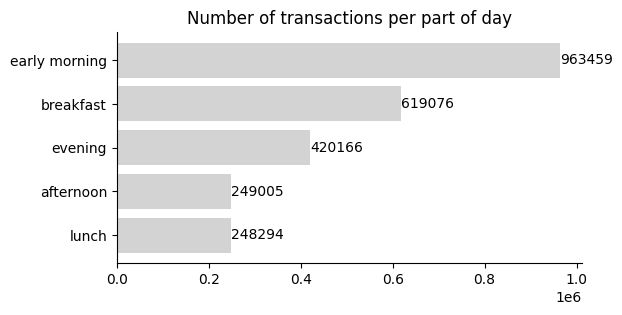

In [52]:
#cc_fraud_eda['trans_day_of_week'] = cc_fraud_eda['trans_datetime'].dt.day_name()

trans_part_of_day = pd.DataFrame({'trans_count': cc_fraud_eda['part_of_day'].value_counts().sort_values()})
#trans_day_of_week['trans_count'] = round(trans_day_of_week['trans_count']/100000 ,2)

fig, ax = plt.subplots(figsize=(6,3))
hbar = ax.barh(trans_part_of_day.index, trans_part_of_day.trans_count, color=colors_h)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Number of transactions per part of day')
ax.bar_label(hbar)
plt.show()

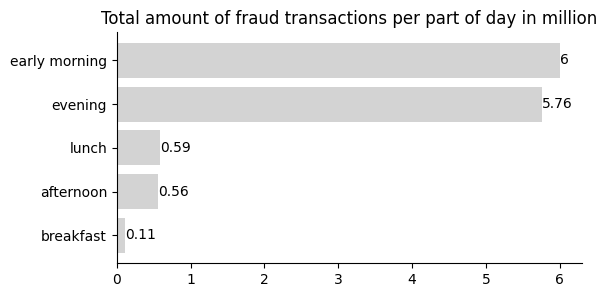

In [53]:
fraud_trans_part_of_day = cc_fraud_eda[cc_fraud_eda['is_fraud']==1]
fraud_trans_amt_part_of_day = fraud_trans_part_of_day.groupby('part_of_day')[['amt']].sum().sort_values('amt')
fraud_trans_amt_part_of_day['amt'] = round(fraud_trans_amt_part_of_day['amt']/1000000,2)

fig, ax = plt.subplots(figsize=(6,3))
hbar = ax.barh(fraud_trans_amt_part_of_day.index, fraud_trans_amt_part_of_day.amt, color=colors_h)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Total amount of fraud transactions per part of day in million')
ax.bar_label(hbar)
plt.show()

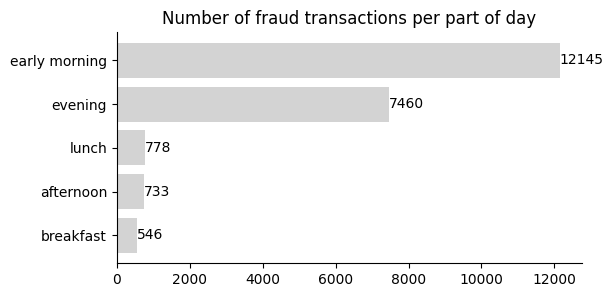

In [54]:
fraud_trans_part_of_day = pd.DataFrame({'trans_count': fraud_trans_part_of_day['part_of_day'].value_counts().sort_values()})

fig, ax = plt.subplots(figsize=(6,3))
hbar = ax.barh(fraud_trans_part_of_day.index, fraud_trans_part_of_day.trans_count, color=colors_h)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Number of fraud transactions per part of day')
ax.bar_label(hbar)
plt.show()

### Merchant

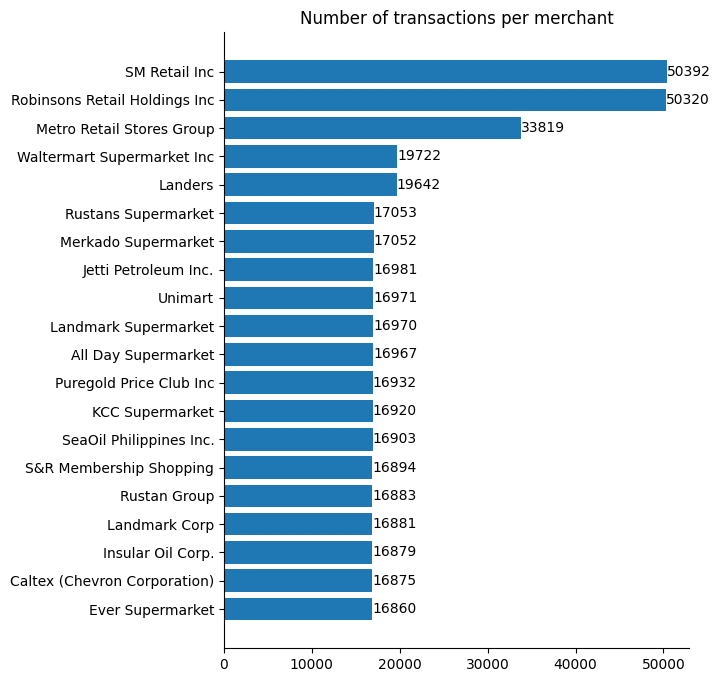

In [55]:
merchant = cc_fraud_eda.groupby('merchant')[['trans_datetime']].count().sort_values('trans_datetime').tail(20)

fig, ax = plt.subplots(figsize=(6,8))
hbar = ax.barh(merchant.index, merchant.trans_datetime)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Number of transactions per merchant')
ax.bar_label(hbar)
plt.show()

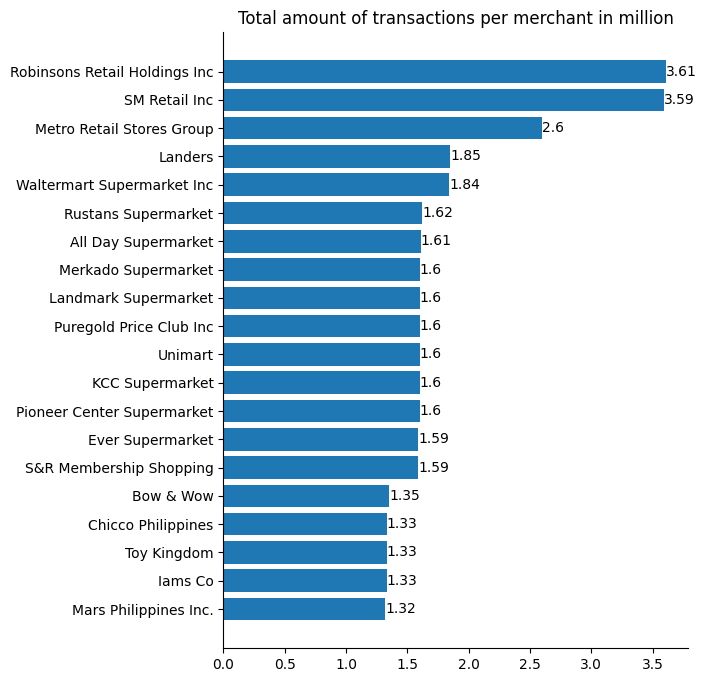

In [56]:
merchant_amt = cc_fraud_eda.groupby('merchant')[['amt']].sum().sort_values('amt').tail(20)
merchant_amt['amt'] = round(merchant_amt['amt']/1000000,2)
fig, ax = plt.subplots(figsize=(6,8))
hbar = ax.barh(merchant_amt.index, merchant_amt.amt)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Total amount of transactions per merchant in million')
ax.bar_label(hbar)
plt.show()

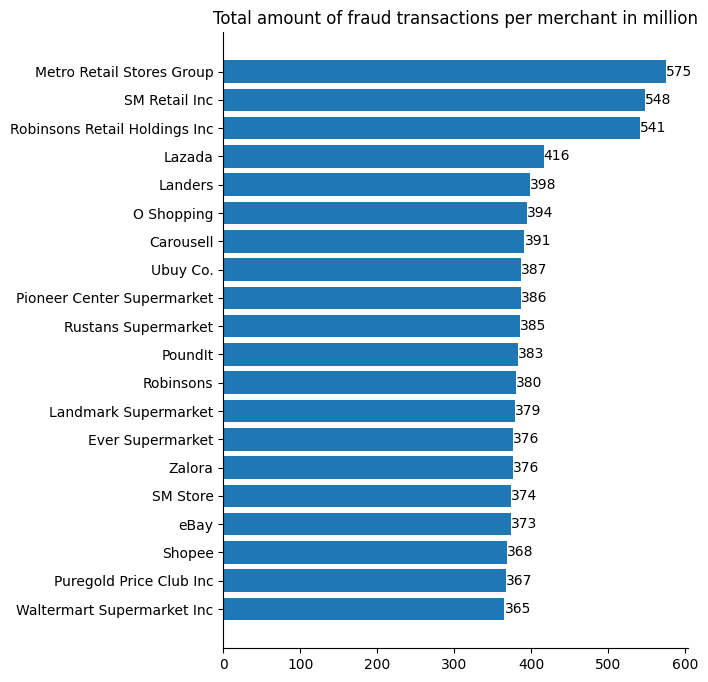

In [57]:
fraud_trans_merchant = cc_fraud_eda[cc_fraud_eda['is_fraud']==1]
fraud_trans_amt_merchant = fraud_trans_merchant.groupby('merchant')[['trans_datetime']].count().sort_values('trans_datetime').tail(20)
#fraud_trans_amt_merchant['amt'] = round(fraud_trans_amt_merchant['amt']/1000000,2)

fig, ax = plt.subplots(figsize=(6,8))
hbar = ax.barh(fraud_trans_amt_merchant.index, fraud_trans_amt_merchant.trans_datetime)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Total amount of fraud transactions per merchant in million')
ax.bar_label(hbar)
plt.show()

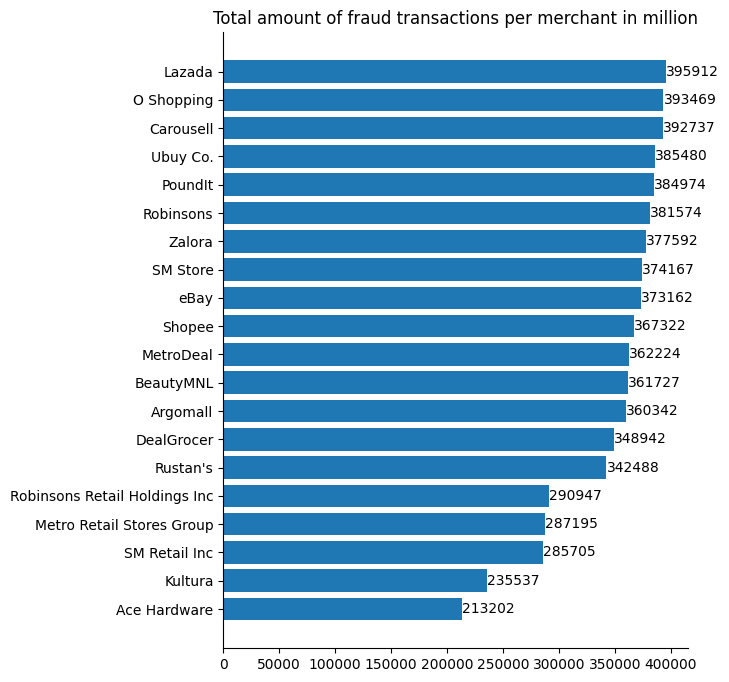

In [58]:
fraud_trans_merchant = cc_fraud_eda[cc_fraud_eda['is_fraud']==1]
fraud_trans_amt_merchant = fraud_trans_merchant.groupby('merchant')[['amt']].sum().sort_values('amt').tail(20)
#fraud_trans_amt_merchant['amt'] = round(fraud_trans_amt_merchant['amt']/1000000,2)

fig, ax = plt.subplots(figsize=(6,8))
hbar = ax.barh(fraud_trans_amt_merchant.index, fraud_trans_amt_merchant.amt)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Total amount of fraud transactions per merchant in million')
ax.bar_label(hbar)
plt.show()

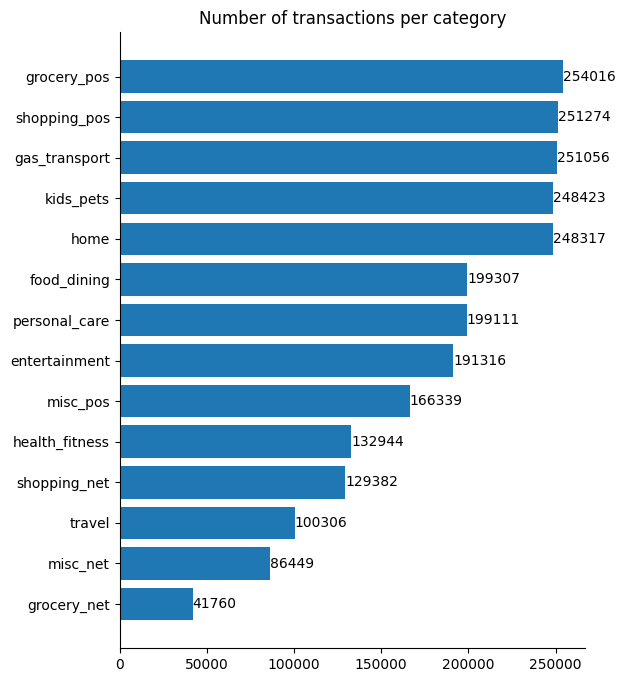

In [59]:
category = cc_fraud_eda.groupby('category')[['trans_datetime']].count().sort_values('trans_datetime').tail(20)

fig, ax = plt.subplots(figsize=(6,8))
hbar = ax.barh(category.index, category.trans_datetime)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Number of transactions per category')
ax.bar_label(hbar)
plt.show()

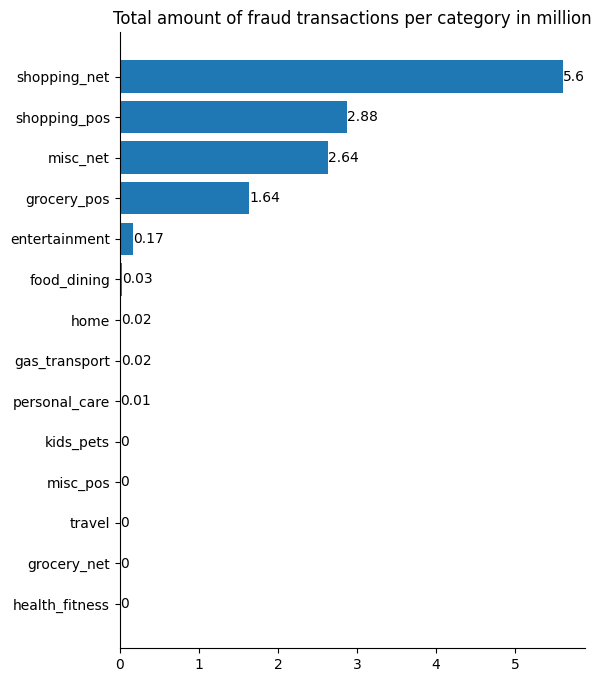

In [60]:
fraud_trans_category = cc_fraud_eda[cc_fraud_eda['is_fraud']==1]
fraud_trans_amt_category = fraud_trans_category.groupby('category')[['amt']].sum().sort_values('amt').tail(20)
fraud_trans_amt_category['amt'] = round(fraud_trans_amt_category['amt']/1000000,2)

fig, ax = plt.subplots(figsize=(6,8))
hbar = ax.barh(fraud_trans_amt_category.index, fraud_trans_amt_category.amt)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Total amount of fraud transactions per category in million')
ax.bar_label(hbar)
plt.show()

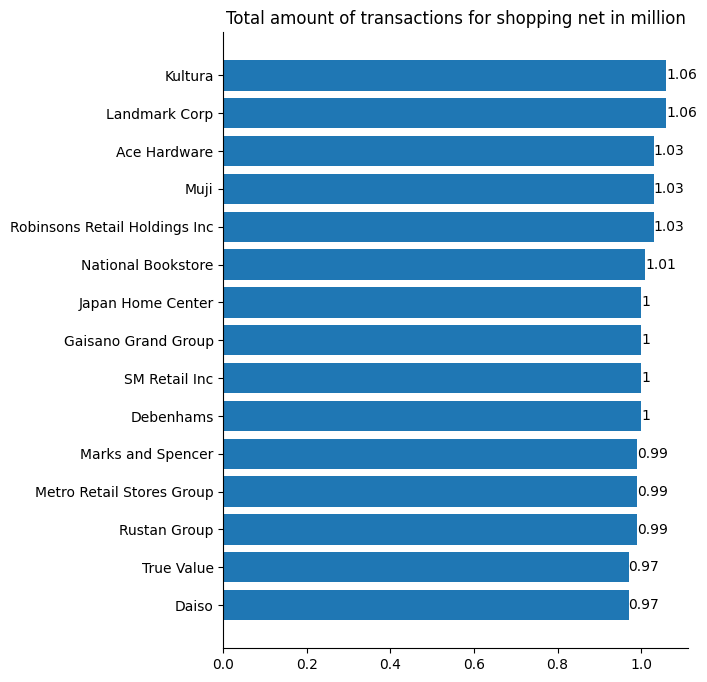

In [61]:
shopping_net = cc_fraud_eda[cc_fraud_eda['category']=='shopping_pos']
shopping_net = shopping_net.groupby('merchant')[['amt']].sum().sort_values('amt')
shopping_net['amt'] = round(shopping_net['amt']/1000000,2)

fig, ax = plt.subplots(figsize=(6,8))
hbar = ax.barh(shopping_net.index, shopping_net.amt)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Total amount of transactions for shopping net in million')
ax.bar_label(hbar)
plt.show()

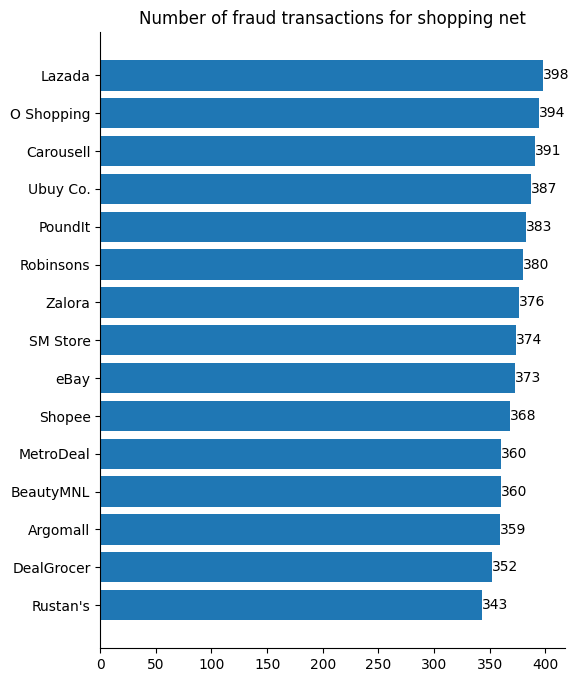

In [62]:
shopping_net_fraud = cc_fraud_eda[(cc_fraud_eda['category']=='shopping_net') & (cc_fraud_eda['is_fraud']==1)]
shopping_net_fraud = shopping_net_fraud.groupby('merchant')[['trans_datetime']].count().sort_values('trans_datetime')
#shopping_net_fraud['amt'] = round(shopping_net_fraud['amt']/1000000,2)

fig, ax = plt.subplots(figsize=(6,8))
hbar = ax.barh(shopping_net_fraud.index, shopping_net_fraud.trans_datetime)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Number of fraud transactions for shopping net')
ax.bar_label(hbar)
plt.show()

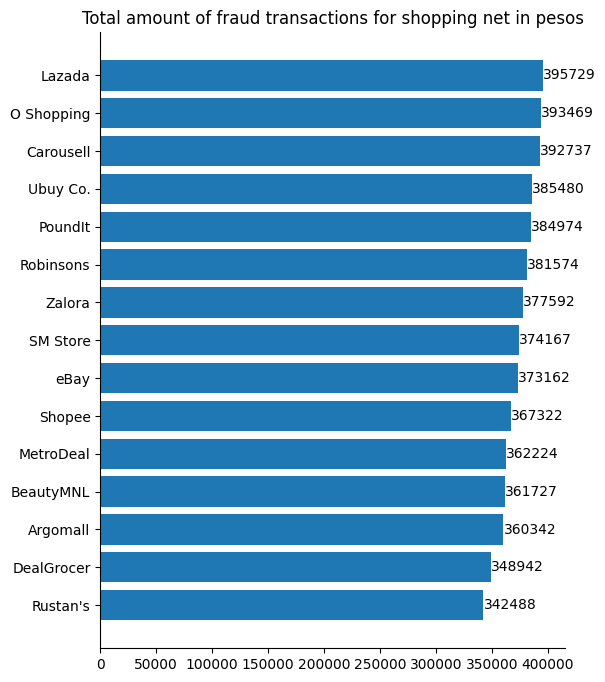

In [63]:
shopping_net_fraud = cc_fraud_eda[(cc_fraud_eda['category']=='shopping_net') & (cc_fraud_eda['is_fraud']==1)]
shopping_net_fraud = shopping_net_fraud.groupby('merchant')[['amt']].sum().sort_values('amt')
#shopping_net_fraud['amt'] = round(shopping_net_fraud['amt']/1000000,2)

fig, ax = plt.subplots(figsize=(6,8))
hbar = ax.barh(shopping_net_fraud.index, shopping_net_fraud.amt)
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    
ax.set_title('Total amount of fraud transactions for shopping net in pesos')
ax.bar_label(hbar)
plt.show()

### Age

In [64]:
print(f"The youngest client is {cc_fraud_eda['age'].min()}")
print(f"The oldest client is {cc_fraud_eda['age'].max()}")

The youngest client is 48
The oldest client is 96


In [65]:
male = cc_fraud_eda[cc_fraud_eda['Gender_'] == 'Male']
print(f"The youngest male client: {male['age'].min()}")
print(f"The oldest male client: {male['age'].max()}")

The youngest male client: 48
The oldest male client: 96


In [66]:
female = cc_fraud_eda[cc_fraud_eda['Gender_'] == 'Female']
print(f"The youngest female client is {female['age'].min()}")
print(f"The oldest female client is {female['age'].max()}")

The youngest female client is 49
The oldest female client is 95


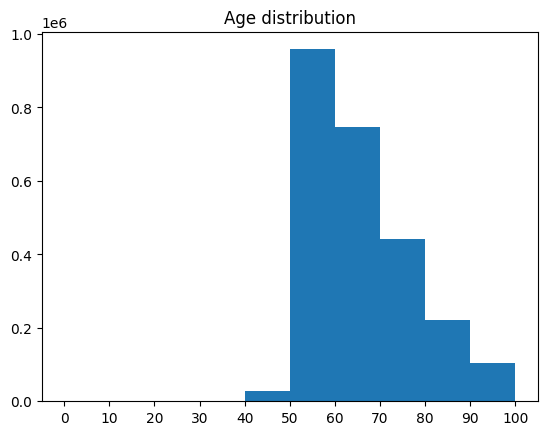

In [67]:
age = [0,10,20,30,40,50,60,70,80,90,100]
plt.hist(cc_fraud_eda['age'], bins=age)
plt.xticks(age)
plt.title("Age distribution")
plt.show()



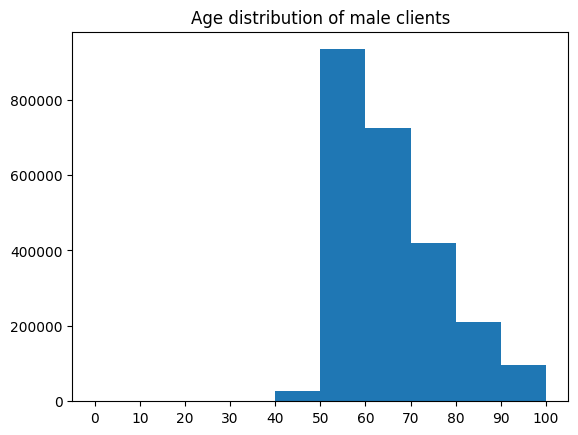

In [68]:
# age distribution for male
age = [0,10,20,30,40,50,60,70,80,90,100]
plt.hist(male['age'], bins=age)
plt.xticks(age)
plt.title("Age distribution of male clients")
plt.show()


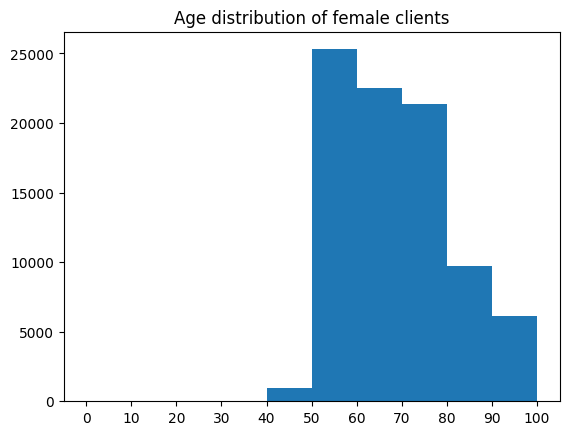

In [69]:
# age distribution for female
age = [0,10,20,30,40,50,60,70,80,90,100]
plt.hist(female['age'], bins=age)
plt.xticks(age)
plt.title("Age distribution of female clients")
plt.show()


### Transaction amount of fraud transactions

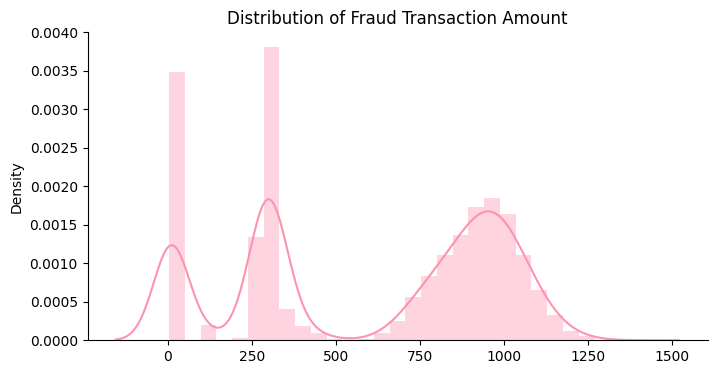

In [70]:
fraud_trans = cc_fraud_eda[cc_fraud_eda['is_fraud']==1]

fig, ax = plt.subplots(figsize=(8,4))
sns.distplot(fraud_trans['amt'].values, ax=ax, color="#FC94AF")
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.set_title('Distribution of Fraud Transaction Amount')
plt.show()

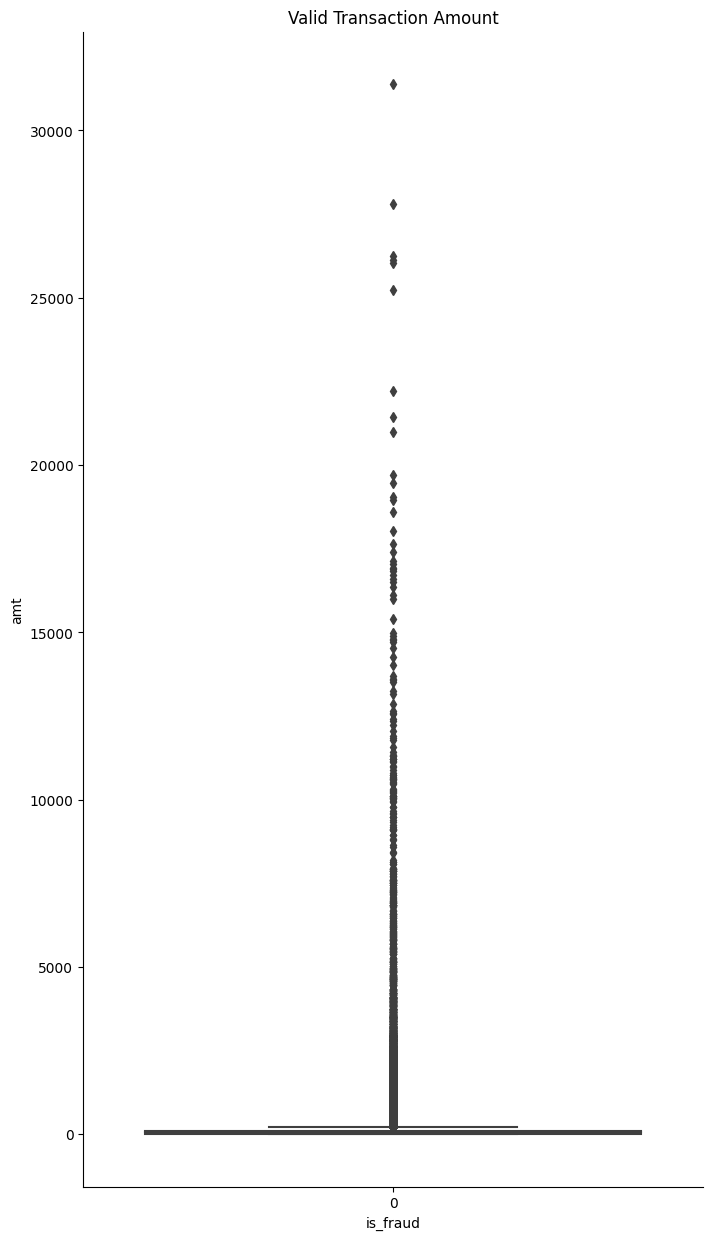

In [71]:
valid_trans = cc_fraud_eda[cc_fraud_eda['is_fraud']==0]

plt.figure(figsize=(8, 15))
ax = plt.subplot(111)

sns.boxplot(data=valid_trans, x='is_fraud', y='amt')

for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.set_title('Valid Transaction Amount')
plt.show()

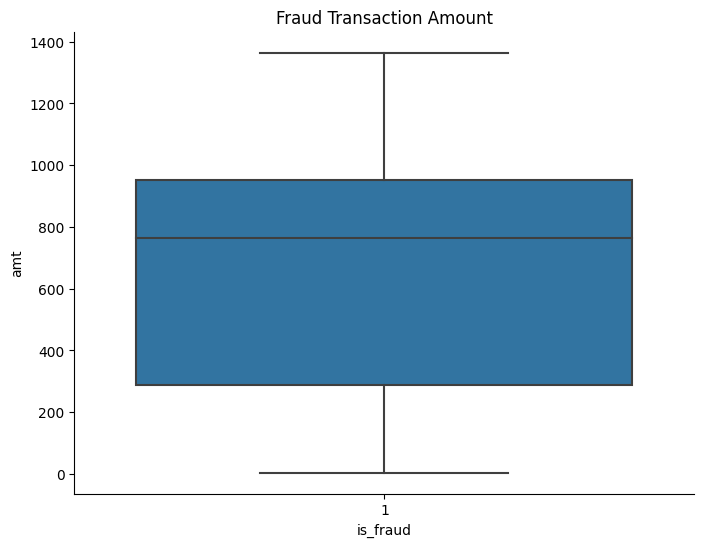

In [72]:
fraud_trans = cc_fraud_eda[cc_fraud_eda['is_fraud']==1]
plt.figure(figsize=(8, 6))
ax = plt.subplot(111)

sns.boxplot(data=fraud_trans, x='is_fraud', y='amt')

for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
ax.set_title('Fraud Transaction Amount')
plt.show()


In [73]:
print(f"Highest fraud transaction amount: {fraud_trans['amt'].max()}")  

Highest fraud transaction amount: 1364.36
